Transforming Data

The ratings.csv file contains user ratings, one movie per line.
Transform the data into a user-movie ratings matrix. There should be 671 rows (one for each user) and 9125 columns (one for each movie). Each cell should contain the users rating for that movie. Note that not every user has rated every movie. Assign a value of 0 for any missing values.

In [1]:
import numpy as np
from plotnine import *
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

ratings = pd.read_csv("small/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [2]:
ratings_pivot = ratings.pivot(index='userId', columns='movieId', values = 'rating')
ratings_pivot = ratings_pivot.fillna(0)
ratings_pivot

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


______________________________________________________________________________________________________________________

Principle Component Analysis

Apply PCA to the reduce the dimensionality of the movies.

(a) Transpose the matrix from Q1 so that rows refer to movies and columns refer to users. Mean center the data. Note that you will only use this transformed, mean-centered data for this question.

In [3]:
ratings_pivot_T = ratings_pivot.T
ratings_pivot_T

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn import decomposition
from sklearn import preprocessing
ratings_pivot_T_scaled = preprocessing.scale(ratings_pivot_T, with_mean=True,with_std=False)
ratings_pivot_T_scaled


array([[-0.00562541, -0.02923009, -0.02007501, ..., -0.01367748,
         3.98698434,  4.95030885],
       [-0.00562541, -0.02923009, -0.02007501, ..., -0.01367748,
        -0.01301566, -0.04969115],
       [-0.00562541, -0.02923009, -0.02007501, ..., -0.01367748,
        -0.01301566, -0.04969115],
       ...,
       [-0.00562541, -0.02923009, -0.02007501, ..., -0.01367748,
        -0.01301566, -0.04969115],
       [-0.00562541, -0.02923009, -0.02007501, ..., -0.01367748,
        -0.01301566, -0.04969115],
       [-0.00562541, -0.02923009, -0.02007501, ..., -0.01367748,
        -0.01301566, -0.04969115]])

(b) Apply PCA with number of components k = 2 to reduce the dimensionality of the movies.

In [33]:
pca=decomposition.PCA(n_components=2)
pca.fit(ratings_pivot_T_scaled)
ratings_pivot_T_transform=pca.transform(ratings_pivot_T_scaled)
ratings_pivot_T_transform

array([[39.47598166,  6.57454356],
       [14.58936909,  2.858288  ],
       [ 4.25762428, -1.53310718],
       ...,
       [-2.35203452,  0.35878672],
       [-2.36524927,  0.33455453],
       [-1.81849624, -0.45528262]])

(c) Plot the results and color each movies by its genre. Genres for each movie are listed in ratings.csv. Since each movie may have more than one genre, to simplify just use the first genre in the list. Discuss what patterns you see in the visualization.

In [6]:
#create movies dataframe to merge movie ID and genres into ratings_pivot_T_transform_df, which will be created below
movies = pd.read_csv("small/movies.csv")
del movies['title']
movies['genres'] = movies['genres'].str.split('|').str[0]
movies

,movieId,genres
0,1,Adventure
1,2,Adventure
2,3,Comedy
3,4,Comedy
4,5,Comedy
...,...,...
9120,162672,Adventure
9121,163056,Action
9122,163949,Documentary
9123,164977,Comedy


In [7]:
#create ratings_pivot_T_transform_df
ratings_pivot_T_transform_df = pd.DataFrame(ratings_pivot_T_transform, columns = ['x','y'])
ratings_pivot_T_transform_df.head(5)
ratings_pivot_T_transform_df['movieId'] = ratings_pivot_T.index

#then merge custom movies df to this by movieId. This is done at this later stage to prevent creating redundant movieId
#and genres columns when rerunning.
ratings_pivot_T_transform_df = movies.merge(ratings_pivot_T_transform_df, on='movieId')
ratings_pivot_T_transform_df


,movieId,genres,x,y
0,1,Adventure,39.475982,6.574570
1,2,Adventure,14.589369,2.858279
2,3,Comedy,4.257624,-1.533091
3,4,Comedy,-1.106876,-0.476498
4,5,Comedy,5.383068,-1.095111
...,...,...,...,...
9061,161944,Drama,-2.192232,0.633706
9062,162376,Drama,-1.737633,1.018118
9063,162542,Romance,-2.352035,0.358787
9064,162672,Adventure,-2.365249,0.334555


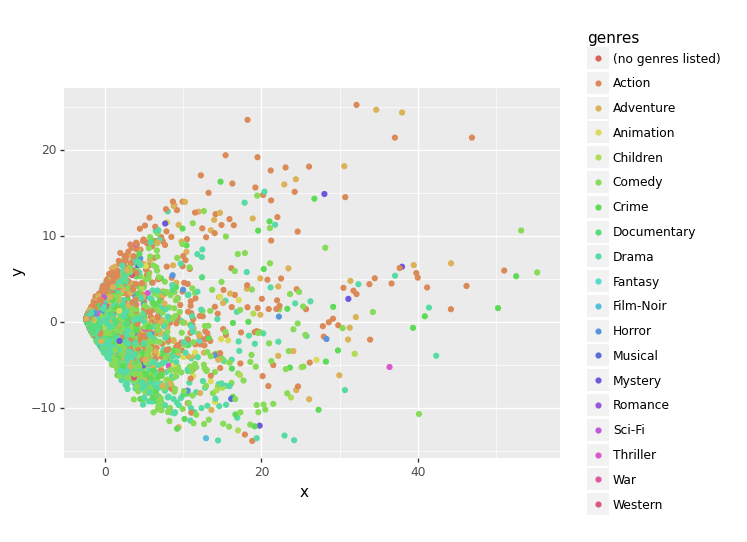

<ggplot: (-9223372036557363796)>

In [8]:
ggplot(ratings_pivot_T_transform_df, aes(x='x',y='y', color = "genres", )) + geom_point()

It looks like the plots converge at y and x = 0 and y values spread out both positively and negatively like a cone as x increases. There does not seem to be a pattern based on the genre.


(d) Determine the “intrinsic” dimensionality of the movies, by finding the number of prin- ciple components that are needed to explain 80% of the variance of the data. Discuss how this compares to k = 2 and how this may impact the quality of the visualization above.

In [9]:
pca=decomposition.PCA(n_components=177)
pca.fit(ratings_pivot_T_scaled)
scores = pca.explained_variance_ratio_
print(scores.sum())

0.801201443429856


In [10]:
pca=decomposition.PCA(n_components=2)
pca.fit(ratings_pivot_T_scaled)
scores = pca.explained_variance_ratio_
print(scores.sum())

0.20878080487338524


The "intrinsic" dimensionality of the movies should be 177 to explain 80% of the variance of the data. When k = 2, this only explains 20%, which would be much less accurate in visualization.

______________________________________________________________________________________________________________________

Clustering

Apply k-means clustering to the data from Q1 (rows=users, columns=movies, no mean- centering) and cluster the users.

(a) For values of k = [2,4,8,16,32], apply k-means and measure theinertiafor each value of k. Plot the resulting inertia scores for each choice of k.

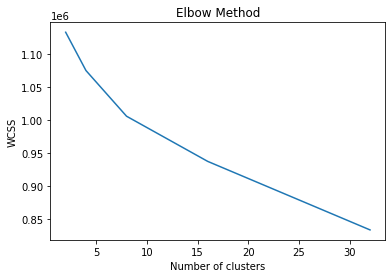

In [11]:
wcss = []
k = [2,4,8,16,32]
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(ratings_pivot)
    wcss.append(kmeans.inertia_)
plt.plot(k, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

(b) From the above results, choose an appropriate value of k from the plot and support your choice.

I choose 8, because it looks like it is at the corner bend of the elbow.

(c) Cluster the data again with your chosen value of k. For each of the resulting clusters, find the top three movies that are highest rated (on average) by the users in the cluster. Report the movie titles and discuss whether the results seem reasonable (i.e., do the top-rated movies in each cluster seem to correspond to recognizable groups).


In [12]:
kmeans = KMeans(8)
rslt = kmeans.fit(ratings_pivot)
fit = (rslt.predict(ratings_pivot))
ratings_pivot['cluster'] = fit

#save this column for use in Q:4d
cluster_column = ratings_pivot['cluster']

In [13]:
ratings_pivot_sorted = ratings_pivot.groupby(['cluster']).mean()
ratings_pivot_sorted = ratings_pivot_sorted.reset_index()
#del ratings_pivot_sorted.movieId
ratings_pivot_sorted

movieId,cluster,1,2,3,4,5,6,7,8,9,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,0,2.085227,0.721591,0.045455,0.000000,0.034091,0.335227,0.096591,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.056818,0.000000,0.000000,0.000000,0.000000
1,1,3.636364,1.818182,0.590909,0.136364,1.590909,2.272727,0.818182,0.000000,0.000000,...,0.000000,0.045455,0.272727,0.090909,0.136364,0.000000,0.409091,0.000000,0.000000,0.000000
2,2,2.517647,1.035294,0.429412,0.111765,0.417647,1.029412,0.264706,0.047059,0.070588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,3.625000,2.500000,1.000000,0.000000,2.000000,2.250000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,1.152941,1.423529,0.423529,0.105882,0.376471,1.023529,0.329412,0.058824,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,2.242424,0.666667,0.439394,0.121212,0.181818,1.454545,0.863636,0.000000,0.212121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,0.895028,0.109116,0.234807,0.019337,0.223757,0.310773,0.180939,0.016575,0.091160,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013812,0.008287,0.000000
7,7,2.833333,0.000000,0.000000,0.000000,0.000000,1.833333,1.333333,0.000000,0.000000,...,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667


In [14]:
c = ['1st Max', '2st Max', '3st Max',]

df = (ratings_pivot_sorted.set_index('cluster')
    .apply(lambda x: pd.Series(x.nlargest(3).index, index = c), axis = 1)
    .reset_index())

df

,cluster,1st Max,2st Max,3st Max
0,0,2571,356,5952
1,1,4993,2571,5952
2,2,260,2571,356
3,3,1234,296,608
4,4,457,590,296
5,5,912,1198,608
6,6,318,260,296
7,7,246,750,903


In [15]:
movies = pd.read_csv("small/movies.csv")
del movies['genres']

df1 = pd.merge(df, movies, how = "left", left_on=["1st Max"], right_on = ['movieId'])
df2 = pd.merge(df1, movies, how = "left", left_on=["2st Max"], right_on = ['movieId'])
df3 = pd.merge(df2, movies, how = "left", left_on=["3st Max"], right_on = ['movieId'])

del df3['movieId_x']
del df3['movieId_y']
del df3['movieId']
del df3['1st Max']
del df3['2st Max']
del df3['3st Max']
df3.columns = ['cluster', '1st Movie', '2nd Movie', '3rd Movie']
top_movies = df3

top_movies

,cluster,1st Movie,2nd Movie,3rd Movie
0,0,"Matrix, The (1999)",Forrest Gump (1994),"Lord of the Rings: The Two Towers, The (2002)"
1,1,"Lord of the Rings: The Fellowship of the Ring,...","Matrix, The (1999)","Lord of the Rings: The Two Towers, The (2002)"
2,2,Star Wars: Episode IV - A New Hope (1977),"Matrix, The (1999)",Forrest Gump (1994)
3,3,"Sting, The (1973)",Pulp Fiction (1994),Fargo (1996)
4,4,"Fugitive, The (1993)",Dances with Wolves (1990),Pulp Fiction (1994)
5,5,Casablanca (1942),Raiders of the Lost Ark (Indiana Jones and the...,Fargo (1996)
6,6,"Shawshank Redemption, The (1994)",Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994)
7,7,Hoop Dreams (1994),Dr. Strangelove or: How I Learned to Stop Worr...,Vertigo (1958)


I am not able to see any patterns based on the top movies by clusters. It could be that I have not seen a lot of the movies, but from what I can tell, the only thing I see consistent among the top movies is that they're all well-known. I cannot tell of the movie clusters correspond to recognizable groups.

______________________________________________________________________________________________________________________

Singular Value Decomposition

Apply SVD to the user-movie matrix from Q1 (rrows=users, columns=movies, no mean- centering).

(a) Apply SVD with number of components k = 32. Plot the resulting singular_values.

In [16]:
#return ratings_pivot back to its original, removing clustering column added in Q3.
del ratings_pivot['cluster']

In [17]:
U, s, V=np.linalg.svd(ratings_pivot)

In [18]:

s = (s[np.argsort(s)[-32:]])

abs(s)

array([ 77.41399697,  77.93137263,  78.765595  ,  79.22060121,
        79.9572191 ,  80.3072336 ,  81.97690614,  82.09439136,
        84.04184504,  84.4018213 ,  85.49577203,  87.28696703,
        88.6199206 ,  89.86862678,  91.66845354,  92.03785085,
        92.94461751,  97.28551406,  99.23143457, 105.22888405,
       105.79872672, 111.49367292, 116.32873458, 118.74152381,
       122.99256885, 136.81751883, 145.23455301, 156.30956977,
       162.47028777, 204.30617832, 243.76943485, 517.58313979])

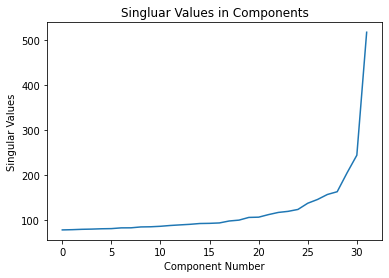

In [19]:
k = range(0,32)
plt.plot(k, s)
plt.title('Singluar Values in Components')
plt.xlabel('Component Number')
plt.ylabel('Singular Values')
plt.show()

(b) For each of the values of k = [2,4,8,16,32] considered above, report the sum of the explained_variance_ratio. Discuss how the results compare to the inertia values above and whether it supports your choice of k.

In [20]:
#this is for part b.
#pca.explained_variance_ratio_

In [35]:
scores = []
k = [2,4,8,16,32]
for i in k:
    pca=decomposition.PCA(n_components=i)
    pca.fit(ratings_pivot)
    scores.append(pca.explained_variance_ratio_.cumsum()[-1])
scores

[0.1646525062362775,
 0.2158546245186961,
 0.27807080547651436,
 0.35025391640191816,
 0.44100142837499096]

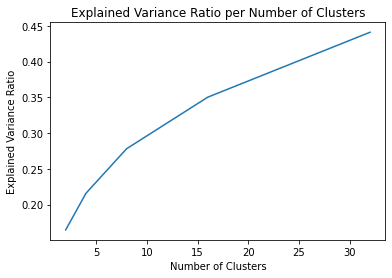

In [22]:
plt.plot(k, scores)
plt.title('Explained Variance Ratio per Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Explained Variance Ratio')
plt.show()

The inertia and ratio seem to have an inverse relationship, i.e. as inertia goes down, the ratio goes up in the same degree.

You can still see the elbow edge in this graph.

(c) Apply SVD with k = 2 and transform the data.

In [23]:
U, s, V=np.linalg.svd(ratings_pivot, full_matrices = False)

In [24]:
a = np.zeros((671, 671))
a[0,0]  = s[0]
a[1,1] = s[1]

X = U @ a @ V

(d) Plot the results (for k = 2) and color the users by the cluster memberships you found above. Discuss any patterns you can see and compare them to the previous analysis (from clustering and PCA).

In [25]:
X = U@a

In [26]:
df=pd.DataFrame(X) 
#shift all rows down by 1 to change row index of df
df = df.shift(1, axis = 0) 
#delete first row containing NaN values
df = df.iloc[1:] #now the df starts index at 1.
df['cluster'] = cluster_column

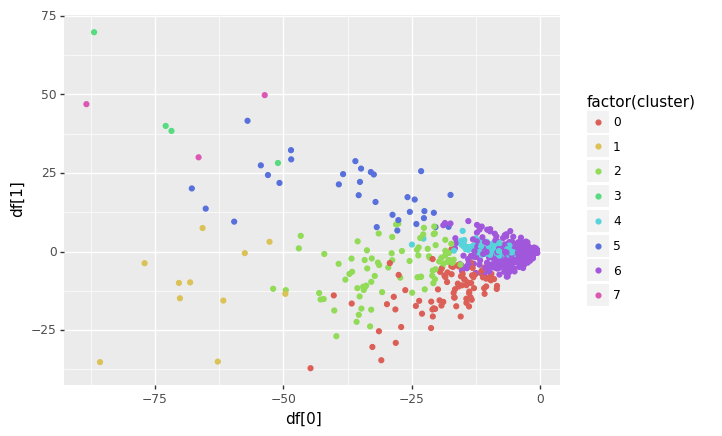

<ggplot: (297916080)>

In [27]:
ggplot(df, aes(x='df[0]',y='df[1]', color = 'factor(cluster)')) + geom_point()

this plot visually looks similar to the laterally-flipped version of the PCA plot with fewer values and color grouped by cluster group instead of genres. at cluster group 0, it looks like most users share very similar opinions, while the later groups seem to have more variation in opinion.

When we determined the top 3 movies by clustering, I concluded that there seemed to be no noticeable pattern. This graph further gave evidence that the clusters are quite arbitrary and do not seem to show too much information.